In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\MOUMITA\\Downloads\\Stock_Price.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df=df.iloc[::-1]
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [5]:
df.shape

(2035, 8)

In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [9]:
#Data Preprocessing
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [10]:
duplicates= df.duplicated()
duplicates.value_counts() # no duplicates present

False    2035
dtype: int64

C:\Users\MOUMITA\AppData\Local\Temp\ipykernel_804\1324887902.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

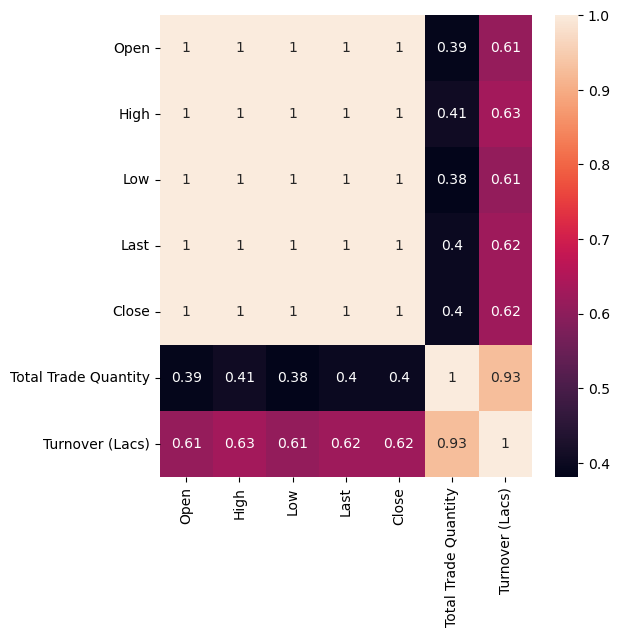

In [11]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)

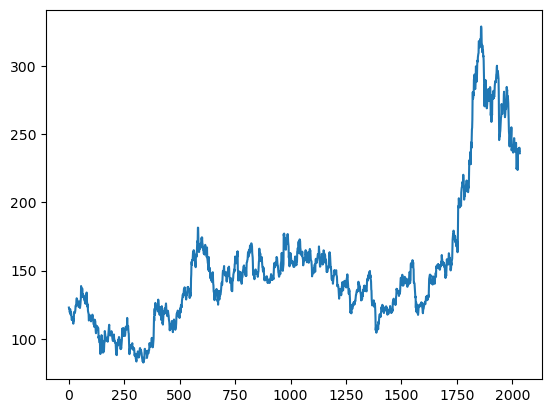

In [12]:
df1=df.reset_index()['High']
plt.plot(df1)

INTRODUCING LSTM:

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
df1.shape

(2035, 1)

In [15]:
df1

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

Before performing LSTM, we have to reshape our data. Also the values are very large, so we are converting the values in the range 0 and 1.

Splitting the data to check the Algo

In [16]:
train_sam = int(len(df1)*0.70)
test_sam = len(df1) - train_sam

In [17]:
train_sam, test_sam

(1424, 611)

In [18]:
train_data, test_data = df1[0:train_sam,:], df1[train_sam:len(df1):1]

In [19]:
train_data.size, test_data.size

(1424, 611)

We train 70% of the data from the high column and test the rest 30% of it to check whether all the datas are following the same trend or not.

Preprocessing Function

In [20]:
def prepros(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
time_step = 100
X_train, Y_train = prepros(train_data, time_step)
X_test, Y_test = prepros(test_data, time_step)

We are using stacked LSTM to re-interpret the data and help network to prevent the mistakes, committed in the first time operation. So here we can go through the data every time and the recent layer of LSTM will learn from the previous layer. And each time the model will get refined and we reach a bit closer to the optimization.

Creating LSTM Model

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

We use adam optimizer for a reason that this algorithm is for optimization technique for gradient descent as using averages makes algorithm converge towards minima in a faster pace.

We use the dense function so that we can get one-to-one correspondence.

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
21/21 [==============================] - 12s 241ms/step - loss: 0.0121 - val_loss: 0.0352
Epoch 2/100
21/21 [==============================] - 4s 171ms/step - loss: 0.0022 - val_loss: 0.0034
Epoch 3/100
21/21 [==============================] - 3s 166ms/step - loss: 9.4401e-04 - val_loss: 0.0041
Epoch 4/100
21/21 [==============================] - 4s 187ms/step - loss: 8.4072e-04 - val_loss: 0.0027
Epoch 5/100
21/21 [==============================] - 4s 185ms/step - loss: 7.9498e-04 - val_loss: 0.0026
Epoch 6/100
21/21 [==============================] - 4s 170ms/step - loss: 7.5697e-04 - val_loss: 0.0023
Epoch 7/100
21/21 [==============================] - 4s 175ms/step - loss: 7.3828e-04 - val_loss: 0.0023
Epoch 8/100
21/21 [==============================] - 4s 174ms/step - loss: 7.3223e-04 - val_loss: 0.0034
Epoch 9/100
21/21 [==============================] - 4s 184ms/step - loss: 7.8053e-04 - val_loss: 0.0040
Epoch 10/100
21/21 [==============================] - 4s 173ms

21/21 [==============================] - 3s 163ms/step - loss: 1.4710e-04 - val_loss: 0.0014
Epoch 78/100
21/21 [==============================] - 3s 162ms/step - loss: 2.1077e-04 - val_loss: 3.5920e-04
Epoch 79/100
21/21 [==============================] - 3s 164ms/step - loss: 1.4245e-04 - val_loss: 5.8463e-04
Epoch 80/100
21/21 [==============================] - 3s 160ms/step - loss: 1.3794e-04 - val_loss: 4.5567e-04
Epoch 81/100
21/21 [==============================] - 3s 159ms/step - loss: 1.2381e-04 - val_loss: 7.3310e-04
Epoch 82/100
21/21 [==============================] - 4s 170ms/step - loss: 1.2841e-04 - val_loss: 3.6472e-04
Epoch 83/100
21/21 [==============================] - 4s 168ms/step - loss: 1.2524e-04 - val_loss: 9.3082e-04
Epoch 84/100
21/21 [==============================] - 3s 163ms/step - loss: 1.2546e-04 - val_loss: 4.8265e-04
Epoch 85/100
21/21 [==============================] - 3s 161ms/step - loss: 1.2397e-04 - val_loss: 5.1178e-04
Epoch 86/100
21/21 [=======

In [26]:
#predictions
#Lets predict and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 1s 37ms/step


In [27]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [28]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

136.05073658491133

In [29]:
#Test Data RMSE
math.sqrt(mean_squared_error(Y_test, test_predict))

214.64668234727586

In [30]:
#Plotting
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df1) - 1, :] = test_predict

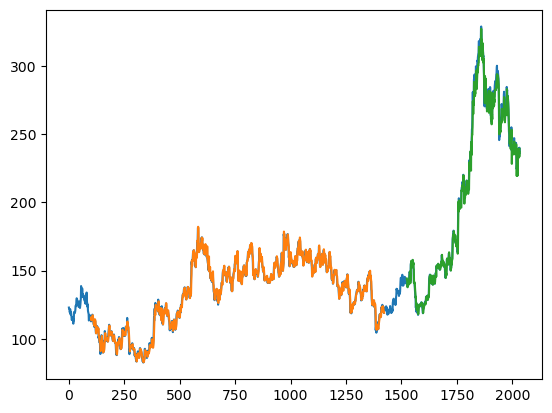

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [31]:
#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

In [32]:
#Predict the next 28 days Stock Price
len(test_data), X_test.shape

(611, (510, 100))

In [33]:
X_input = test_data[409:].reshape(1,-1)
X_input.shape

(1, 202)

In [34]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [35]:
lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

In [36]:
while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

0 day input [0.82150844 0.84204107 0.88127668 0.87741411 0.85261232 0.83533238
 0.84224436 0.85850783 0.88900183 0.89855662 0.89530392 0.90892458
 0.9144135  0.91888595 0.92091889 0.95629193 0.95547876 0.94389103
 0.94470421 0.93799553 0.94755032 0.96117097 0.96300061 0.96076438
 0.9510063  0.99837365 1.         0.99247815 0.95222606 0.94714373
 0.92376499 0.94389103 0.9266111  0.9266111  0.92884733 0.91075422
 0.91278715 0.89815003 0.8623704  0.82211832 0.78918479 0.76235007
 0.8196788  0.82821712 0.80097581 0.84082131 0.83838178 0.82313478
 0.81297012 0.78979467 0.77820695 0.75645456 0.76072372 0.76885546
 0.78064647 0.80056922 0.78959138 0.79101443 0.78938809 0.81439317
 0.77922342 0.77820695 0.78511893 0.78816833 0.80707461 0.80687132
 0.8196788  0.81276682 0.77332791 0.73531206 0.7460866  0.73937792
 0.71599919 0.73470218 0.74385038 0.73673511 0.79528359 0.79182761
 0.79792641 0.78959138 0.78410246 0.80849766 0.80463509 0.78694857
 0.79284407 0.79101443 0.80260215 0.82313478 0.832

4 day output [[0.590617]]
5 day input [0.83533238 0.84224436 0.85850783 0.88900183 0.89855662 0.89530392
 0.90892458 0.9144135  0.91888595 0.92091889 0.95629193 0.95547876
 0.94389103 0.94470421 0.93799553 0.94755032 0.96117097 0.96300061
 0.96076438 0.9510063  0.99837365 1.         0.99247815 0.95222606
 0.94714373 0.92376499 0.94389103 0.9266111  0.9266111  0.92884733
 0.91075422 0.91278715 0.89815003 0.8623704  0.82211832 0.78918479
 0.76235007 0.8196788  0.82821712 0.80097581 0.84082131 0.83838178
 0.82313478 0.81297012 0.78979467 0.77820695 0.75645456 0.76072372
 0.76885546 0.78064647 0.80056922 0.78959138 0.79101443 0.78938809
 0.81439317 0.77922342 0.77820695 0.78511893 0.78816833 0.80707461
 0.80687132 0.8196788  0.81276682 0.77332791 0.73531206 0.7460866
 0.73937792 0.71599919 0.73470218 0.74385038 0.73673511 0.79528359
 0.79182761 0.79792641 0.78959138 0.78410246 0.80849766 0.80463509
 0.78694857 0.79284407 0.79101443 0.80260215 0.82313478 0.83207969
 0.83695873 0.83756861 0.

8 day output [[0.5739503]]
9 day input [0.89855662 0.89530392 0.90892458 0.9144135  0.91888595 0.92091889
 0.95629193 0.95547876 0.94389103 0.94470421 0.93799553 0.94755032
 0.96117097 0.96300061 0.96076438 0.9510063  0.99837365 1.
 0.99247815 0.95222606 0.94714373 0.92376499 0.94389103 0.9266111
 0.9266111  0.92884733 0.91075422 0.91278715 0.89815003 0.8623704
 0.82211832 0.78918479 0.76235007 0.8196788  0.82821712 0.80097581
 0.84082131 0.83838178 0.82313478 0.81297012 0.78979467 0.77820695
 0.75645456 0.76072372 0.76885546 0.78064647 0.80056922 0.78959138
 0.79101443 0.78938809 0.81439317 0.77922342 0.77820695 0.78511893
 0.78816833 0.80707461 0.80687132 0.8196788  0.81276682 0.77332791
 0.73531206 0.7460866  0.73937792 0.71599919 0.73470218 0.74385038
 0.73673511 0.79528359 0.79182761 0.79792641 0.78959138 0.78410246
 0.80849766 0.80463509 0.78694857 0.79284407 0.79101443 0.80260215
 0.82313478 0.83207969 0.83695873 0.83756861 0.83350274 0.83431592
 0.84752999 0.85728807 0.86033747

13 day output [[0.5519726]]
14 day input [0.92091889 0.95629193 0.95547876 0.94389103 0.94470421 0.93799553
 0.94755032 0.96117097 0.96300061 0.96076438 0.9510063  0.99837365
 1.         0.99247815 0.95222606 0.94714373 0.92376499 0.94389103
 0.9266111  0.9266111  0.92884733 0.91075422 0.91278715 0.89815003
 0.8623704  0.82211832 0.78918479 0.76235007 0.8196788  0.82821712
 0.80097581 0.84082131 0.83838178 0.82313478 0.81297012 0.78979467
 0.77820695 0.75645456 0.76072372 0.76885546 0.78064647 0.80056922
 0.78959138 0.79101443 0.78938809 0.81439317 0.77922342 0.77820695
 0.78511893 0.78816833 0.80707461 0.80687132 0.8196788  0.81276682
 0.77332791 0.73531206 0.7460866  0.73937792 0.71599919 0.73470218
 0.74385038 0.73673511 0.79528359 0.79182761 0.79792641 0.78959138
 0.78410246 0.80849766 0.80463509 0.78694857 0.79284407 0.79101443
 0.80260215 0.82313478 0.83207969 0.83695873 0.83756861 0.83350274
 0.83431592 0.84752999 0.85728807 0.86033747 0.87700752 0.88310632
 0.85362879 0.8485464

19 day output [[0.5299107]]
20 day input [0.94755032 0.96117097 0.96300061 0.96076438 0.9510063  0.99837365
 1.         0.99247815 0.95222606 0.94714373 0.92376499 0.94389103
 0.9266111  0.9266111  0.92884733 0.91075422 0.91278715 0.89815003
 0.8623704  0.82211832 0.78918479 0.76235007 0.8196788  0.82821712
 0.80097581 0.84082131 0.83838178 0.82313478 0.81297012 0.78979467
 0.77820695 0.75645456 0.76072372 0.76885546 0.78064647 0.80056922
 0.78959138 0.79101443 0.78938809 0.81439317 0.77922342 0.77820695
 0.78511893 0.78816833 0.80707461 0.80687132 0.8196788  0.81276682
 0.77332791 0.73531206 0.7460866  0.73937792 0.71599919 0.73470218
 0.74385038 0.73673511 0.79528359 0.79182761 0.79792641 0.78959138
 0.78410246 0.80849766 0.80463509 0.78694857 0.79284407 0.79101443
 0.80260215 0.82313478 0.83207969 0.83695873 0.83756861 0.83350274
 0.83431592 0.84752999 0.85728807 0.86033747 0.87700752 0.88310632
 0.85362879 0.84854645 0.86480992 0.86765603 0.86013417 0.85464525
 0.84448059 0.8072779

25 day output [[0.51186645]]
26 day input [1.         0.99247815 0.95222606 0.94714373 0.92376499 0.94389103
 0.9266111  0.9266111  0.92884733 0.91075422 0.91278715 0.89815003
 0.8623704  0.82211832 0.78918479 0.76235007 0.8196788  0.82821712
 0.80097581 0.84082131 0.83838178 0.82313478 0.81297012 0.78979467
 0.77820695 0.75645456 0.76072372 0.76885546 0.78064647 0.80056922
 0.78959138 0.79101443 0.78938809 0.81439317 0.77922342 0.77820695
 0.78511893 0.78816833 0.80707461 0.80687132 0.8196788  0.81276682
 0.77332791 0.73531206 0.7460866  0.73937792 0.71599919 0.73470218
 0.74385038 0.73673511 0.79528359 0.79182761 0.79792641 0.78959138
 0.78410246 0.80849766 0.80463509 0.78694857 0.79284407 0.79101443
 0.80260215 0.82313478 0.83207969 0.83695873 0.83756861 0.83350274
 0.83431592 0.84752999 0.85728807 0.86033747 0.87700752 0.88310632
 0.85362879 0.84854645 0.86480992 0.86765603 0.86013417 0.85464525
 0.84448059 0.8072779  0.71843871 0.66192316 0.67696686 0.67554381
 0.67310429 0.684285

In [37]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [38]:
day_new.shape

(100,)

In [39]:
day_pred.shape

(28,)

In [40]:
len(df1)

2035

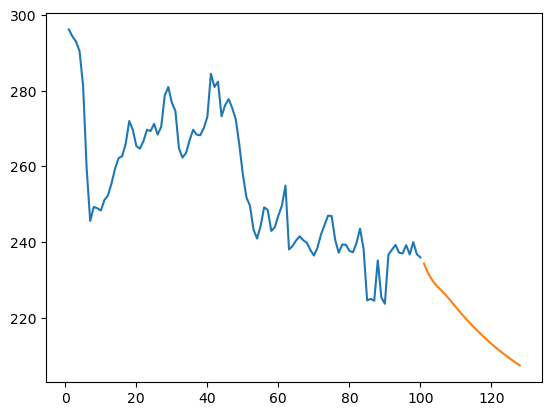

In [41]:
plt.plot(day_new, scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

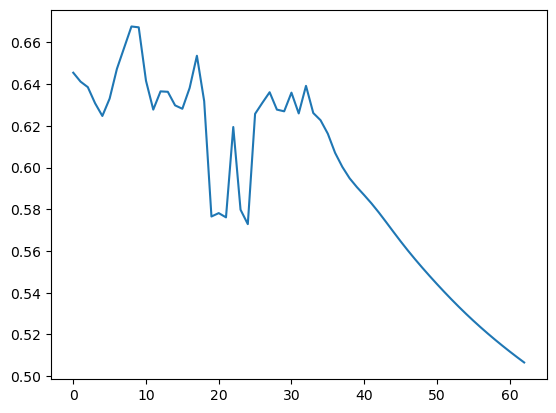

In [42]:
data_new = df1.tolist()
data_new.extend(lst_output)
plt.plot(data_new[2000:])

In [43]:
data_new =scaler.inverse_transform(data_new).tolist()

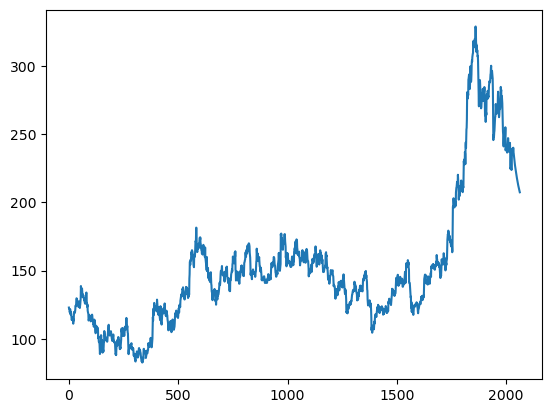

In [44]:
plt.plot(data_new)